In [ ]:
import numpy as np
import math

## Call - Put Parity: C - P = S - K*exp(-rT)

We consider a Call option at the money with maturity T=3 years on a risky asset (without dividends) with initial price 10.76 euros. The annual interest rate is 4.890000 %. The price of the call today is 2.36. What is the initial price of the Put option with same characteristics? (Tolerance +/- 0.01)

In [ ]:
C = 2.36
T = 3
r = 0.0489
K = 10.76
S = K # at the money
P = C-S+K*np.exp(-r*T)
P

0.891830328007444

Let W be a Brownian motion. Find the coefficient b such that e^{b+ aW_t} has an expectation equal to 1, with the parameters a=5.900000, t=0.600000 (expected accuracy = 0.001). With B = 1 we have:

We have E(e^{b+ aW_t}) = B

ie:

E(e^{aW_t}) = B*e^{-b)

ie:

e^{a^2*t/2) = B*e^{-b)

ie:

So b = -a^2*t/2 + ln(B)

In [ ]:
B = 1
a = 5.9
t = 0.6
b = -a**(2)*t/2 + np.log(B)
b

-10.443

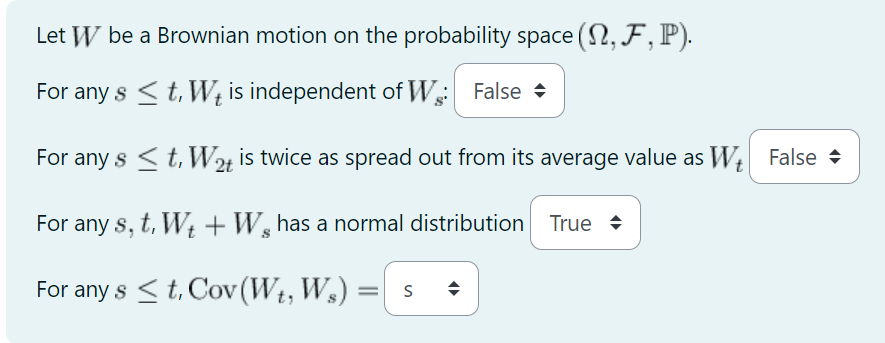

We consider a discrete time model with 1 period. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of a Call option, in this discrete time model, with the parameters S_0=100.16, K=99.44, r=0.004, p=0.21, x=2.73, y=2.17 (expected accuracy = 0.001).

Compute the price at t=0 of a Call option, in the Black-Scholes model, with the parameters S_0=99.020000, T=0.164000, K=98.960000, r=0.097000, q=0.000000, \sigma=0.164800 (expected accuracy = 0.001).

In [ ]:
from scipy.stats import norm

class BsOption:
    def __init__(self, S, K, T, r, sigma, q=0):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.q = q

    @staticmethod
    def N(x):
        return norm.cdf(x)
    @property
    def params(self):
        return {'S': self.S, 'K': self.K, 'T': self.T, 'r':self.r,'q':self.q,'sigma':self.sigma}
    def d1(self):
        return (np.log(self.S/self.K) + (self.r -self.q + self.sigma**2/2)*self.T)/(self.sigma*np.sqrt(self.T))
    def d2(self):
        return self.d1() - self.sigma*np.sqrt(self.T)
    def _call_value(self):
        return self.S*np.exp(-self.q*self.T)*self.N(self.d1()) - self.K*np.exp(-self.r*self.T) * self.N(self.d2())
    def _put_value(self):
        return self.K*np.exp(-self.r*self.T) * self.N(-self.d2()) - self.S*np.exp(-self.q*self.T)*self.N(-self.d1())
    def price(self, type_ = 'C'):
        if type_ == 'C':
            return self._call_value()
        if type_ == 'P':
            return self._put_value()
        if type_ == 'B':
            return  {'call': self._call_value(), 'put': self._put_value()}
        else:
            raise ValueError('Unrecognized type')

if __name__ == '__main__':
    K = 98.96
    r = 0.097
    T = 0.164
    sigma = 0.1648
    S = 99.02
    print(BsOption(S, K, T, r, sigma).price('B'))

{'call': 3.5048275343049937, 'put': 1.8830273491824272}


In [ ]:
S_0=97.400000
T=0.114000
K=94.000000
r=0.098000
sigma=0.254600
print(BsOption(S, K, T, r, sigma).price('B'))

{'call': 3.0714257713259343, 'put': 3.2971022247813906}


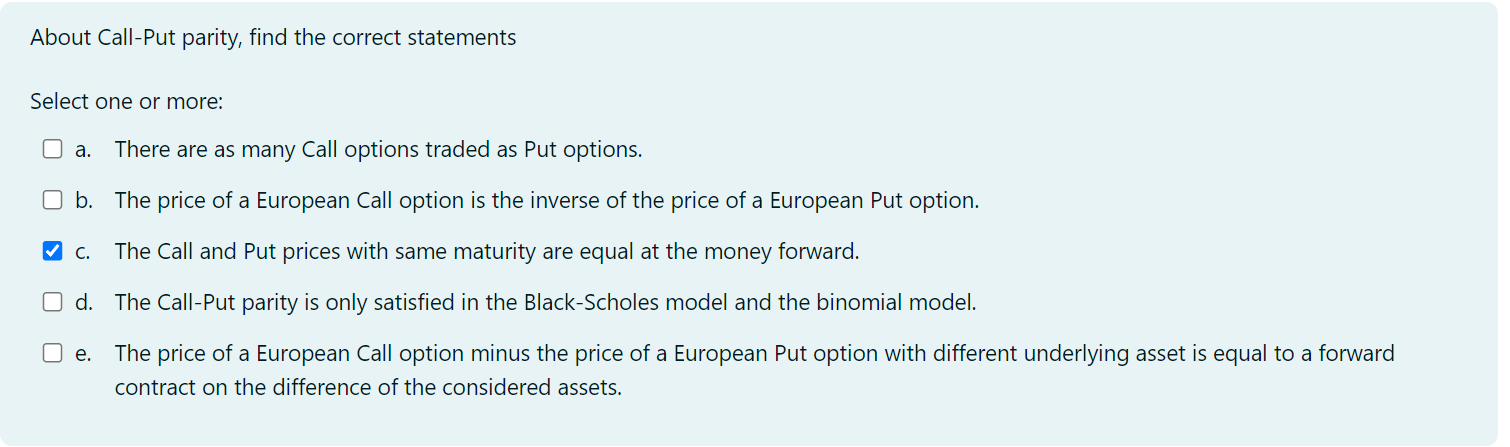

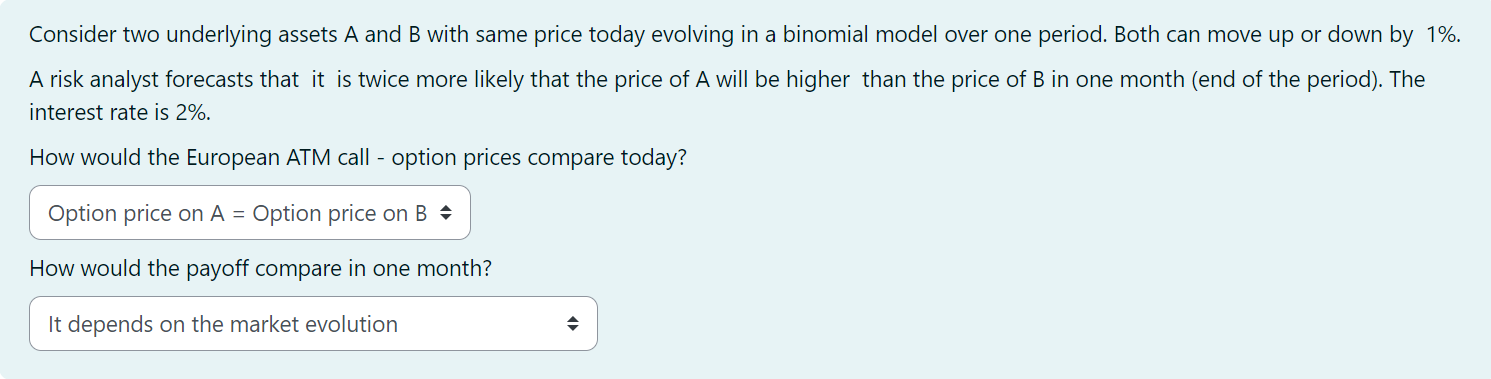

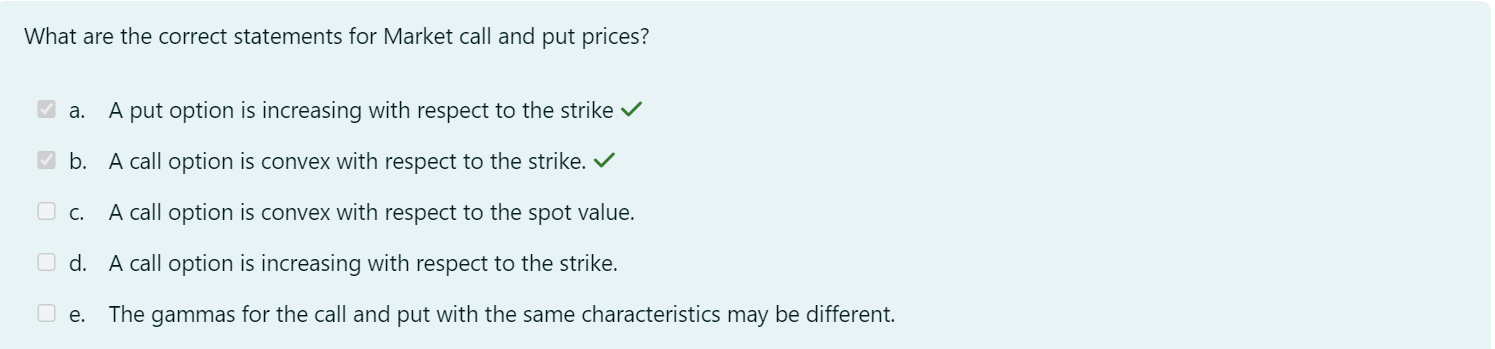

Example #3: Computing Volatility Implied From a Call Option using Newton-Raphson Method
Consider a European call option with three months to expiry. The call price is 4, the stock price is 60, the strike price is 65, and the risk-free interest rate is 8% per year. Thus, c = 4, S = 60, X = 65, T = 0.25, r = 0.08

Python Code for a Volatility Implied From a Call Option using Newton-Raphson Method
The ImpliedVolatilityCall function returns the implied volatility of a European plain vanilla call stock option.

In [ ]:
from scipy.optimize import fmin
import numpy as np
import scipy.stats as si

def NORMSDIST(x):
    NORMSDIST = si.norm.cdf(x,0.0,1.0)
    return(NORMSDIST)

T=0.105000
X=98.410000
S=92.760000
r=0.035000
cm = 1.242808

# S = 60
# X = 65
# r = 0.08
# T = 0.25
# cm = 4
pm = cm -S + X*np.exp(-r*T)

def ImpliedVolatilityPut(s):
    d1 = ( (np.log(S/X)+(r+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - pm
    val = of**2
    print("[σ]=",s,", Object Function Value:", val)
    return(val)

s = fmin(ImpliedVolatilityPut, [np.sqrt(np.abs(np.log(S*np.exp(r*T)/K))*2/T)])

[σ]= [0.19804904] , Object Function Value: 0.34434766577981507
[σ]= [0.2079515] , Object Function Value: 0.25130044474075963
[σ]= [0.21785395] , Object Function Value: 0.17055490445728866
[σ]= [0.2277564] , Object Function Value: 0.10378430652586564
[σ]= [0.2475613] , Object Function Value: 0.01794551044138143
[σ]= [0.26736621] , Object Function Value: 0.0037926546598883322
[σ]= [0.30697602] , Object Function Value: 0.2206352876266226
[σ]= [0.2475613] , Object Function Value: 0.01794551044138143
[σ]= [0.28717111] , Object Function Value: 0.06925164450011984
[σ]= [0.25746376] , Object Function Value: 0.0013702307914153374
[σ]= [0.2475613] , Object Function Value: 0.01794551044138143
[σ]= [0.26241498] , Object Function Value: 0.00014609404684221114
[σ]= [0.26736621] , Object Function Value: 0.0037926546598900826
[σ]= [0.25993937] , Object Function Value: 0.0001566330818005931
[σ]= [0.2648906] , Object Function Value: 0.0013533331827027143
[σ]= [0.26117718] , Object Function Value: 5.1370

In [ ]:
BsOption(S, X, T, r, 0.2612).price('B')

{'call': 1.2428081786908614, 'put': 6.531815159649597}

Example: ImpliedVolatilityCall(s) will return an implied volatility of 11.70% as in the numerical example above.

Example #4: Computing Volatility Implied From a Put Option using Newton-Raphson Method
Consider a European put option with three months to expiry. The put price is 8, the stock price is 60, the strike price is 65, and the risk-free interest rate is 8% per year. Thus, p = 8, S = 60, X = 65, T = 0.25, r = 0.08

Python Code for a Volatility Implied From a Put Option using Newton-Raphson Method
The ImpliedVolatilityPut function returns the implied volatility of a European plain vanilla put stock option.

European plain vanilla call stock option.

In [ ]:
from scipy.optimize import fmin

S = 60
X = 65
r = 0.08
T = 0.25
pm = 8

def ImpliedVolatilityPut(s):
    d1 = ( (np.log(S/X)+(r+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - pm
    val = of**2
    print("[σ]=",s,", Object Function Value:", val)
    return(val)

s = fmin(ImpliedVolatilityPut, [np.sqrt(np.abs(np.log(S0*np.exp(r*T)/K))*2/T)])

[σ]= [1.9023809] , Object Function Value: 272.75230614216235
[σ]= [1.99749995] , Object Function Value: 308.1744893888589
[σ]= [1.80726186] , Object Function Value: 239.13266539127068
[σ]= [1.71214281] , Object Function Value: 207.40341910387804
[σ]= [1.52190472] , Object Function Value: 149.95307372357578
[σ]= [1.33166663] , Object Function Value: 101.04135850048078
[σ]= [0.95119045] , Object Function Value: 31.068174324457587
[σ]= [0.57071427] , Object Function Value: 1.0570298791634092
[σ]= [-0.19023809] , Object Function Value: 79.95867364926936
[σ]= [0.19023809] , Object Function Value: 11.189860173297268
[σ]= [0.95119045] , Object Function Value: 31.068174324457587
[σ]= [0.38047618] , Object Function Value: 1.5013826687184892
[σ]= [0.76095236] , Object Function Value: 10.914665067511445
[σ]= [0.47559523] , Object Function Value: 0.01091606942980986
[σ]= [0.38047618] , Object Function Value: 1.5013826687184892
[σ]= [0.52315475] , Object Function Value: 0.2124220440393923
[σ]= [0.4

In [ ]:
BsOption(S, X, T, r, 0.48441975).price('B')

{'call': 4.28732919393364, 'put': 8.000242958872725}

Example: ImpliedVolatilityPut(s) will return an implied volatility of 48.44% as in the numerical example above.

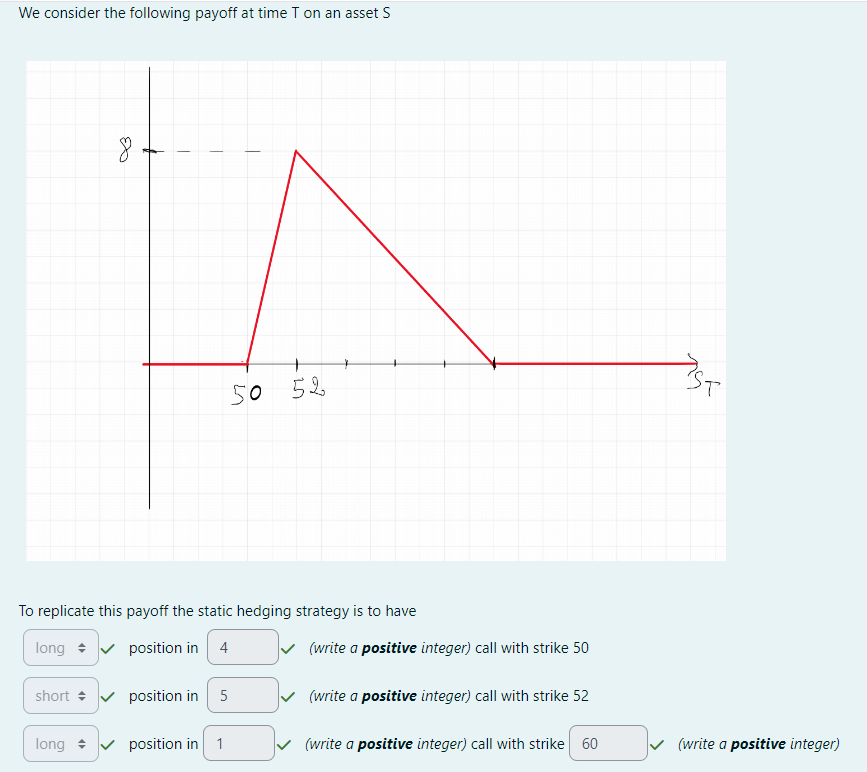

We consider a discrete time model with 1 period. At each period, the asset can increase by x% with probability p and decrease by y% with probability 1-p.
The asset does not pay dividend and the interest rate is r (using the notation from the lectures).
Compute the price at t=0 of a Call option, in this discrete time model, with the parameters S_0=99.89, K=100.38, r=0.004, p=0.20, x=2.94, y=2.06 (expected accuracy = 0.001).

In [ ]:
S0=99.66
K=100.24
r=0.001
p=0.29
x=1.65
y=2.32
u = (1+x/100)
d = (1-y/100)

psiu = max(S0*u - K, 0)
psid = max(S0*d - K, 0)

C = psiu*((1+r-d)/(u-d))/(1+r) + psid*((u-1-r)/(u-d))/(1+r)
C

0.6481739419270902

In [ ]:
# Initialise parameters
S0 = 60      # initial stock price
K = 55       # strike price
T = 2         # time to maturity in years
r = 0.06      # annual risk-free rate
N = 1         # number of time steps
x = 15
y = 15
u = (1+x/100)       # up-factor in binomial models
d = (1-y/100)       # ensure recombining tree
opttype = 'C' # Option Type 'C' or 'P'

def binomial_tree_fast(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    C = S0 * d ** (np.arange(N,-1,-1)) * u ** (np.arange(0,N+1,1))

    # initialise option values at maturity
    C = np.maximum( C - K , np.zeros(N+1) )

    # step backwards through tree
    for i in np.arange(N,0,-1):
        C = disc * ( q * C[1:i+1] + (1-q) * C[0:i] )

    return C[0]
binomial_tree_fast(K,T,S0,r,N,u,d,opttype='C')

11.485489343552759

A stock is worth $60 today.

In a year the stock price can rise or fall by 15 percent.

If the interest rate is 6%, what is the price of a call option that expires in two years and has an exercise price of $55?

A. $17.11.

B. $11.98.

C. $2.41.

Correct Answer: B

The risk-neutral probability is π = (1.06 - 0.85) / (1.15 - 0.85) = 0.7, and 1 - π = 0.3.

Stock prices in the binomial tree one and two years from now are

S+ = 60 (1.15) = $69.

S- = 60 (0.85) = $51.

S++ = 60 (1.15) (1.15) = $79.35.

S+- = S-+ = 60 (1.15) (0.85) = $58.65.

S-- = 60 (0.85) (0.85) = $43.35.

Call option values at expiration two years from now are:

c++ = Max (0, 79.35 - 55) = $24.35.

c+- = c-+ = Max (0, 58.65 - 55) = $3.65.

c-- = Max (0, $43.35 - 55) = $0.

The option prices at the end of year 1:

c+ = (0.7 x 24.35 + 0.3 x 3.65)/(1.06) = $17.11.

c- = (0.7 x 3.65 + 0.3 x 0)/(1.06) = $2.41.

The call price today is c = (0.7 x 17.11 + 0.3 x 2.41)/1.06 = $11.98.


Practice Question 1
A stock is worth $60 today.

In a year the stock price can rise or fall by 15 percent. The interest rate is 6%. A put option expires in two years and has an exercise price of $60.
Use the two-period binomial model to calculate the put option price.

Correct Answer: $1.83

The risk-neutral probability is π = (1.06 - 0.85) / (1.15 - 0.85) = 0.7, and 1 - π = 0.3.

Stock prices in the binomial tree one and two years from now are

S+ = 60 (1.15) = $69.

S- = 60 (0.85) = $51.

S++ = 60 (1.15) (1.15) = $79.35.

S+- = S-+ = 60 (1.15) (0.85) = $58.65.

S-- = 60 (0.85) (0.85) = $43.35.

Put option values at expiration two years from now are:

p++ = Max (0, 60 - 79.35) = $0.

p+- = p-+ = Max (0, 60 - 58.65) = $1.35.

p-- = Max (0, 60 - 43.35) = $16.65.

The option prices at the end of year 1:

p+ = (0.7 x 0 + 0.3 x 1.35)/(1.06) = $0.3821.

p- = (0.7 x 1.35 + 0.3 x 16.65)/(1.06) = $5.60.

The put price today is p = (0.7 x 0.3821 + 0.3 x 5.6)/1.06 = $1.83
